# Heart Attack Prediction (EDA) + Predictions

## Importing Data and Overall Data Analysis

In [77]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from lifelines import KaplanMeierFitter
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Read CSV file and assign variable
df = pd.read_csv("heart_attack_prediction_dataset.csv")
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [3]:
# Measurements of Central Tendency
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [4]:
# Display dtypes for the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [5]:
# Check for missing values
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

## Feature Engineering and Column Selection

In [6]:
# Drop patient id column
df.drop(columns =['Patient ID'], inplace=True)

In [7]:
# Extract systolic and diastolic blood pressure values
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df.drop(columns='Blood Pressure', inplace=True)

In [8]:
#Function to assign blood pressure category based on systolic and diastolic bp
def categorize_blood_pressure(row):
    systolic = row['Systolic BP']
    diastolic = row['Diastolic BP']
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif 120 <= systolic <= 129 and diastolic < 80:
        return 'Elevated'
    elif (130 <= systolic <=139 or 80 <= diastolic <= 89):
        return 'High Blood Pressure(Hypertension) Stage 1'
    elif systolic >= 140 or diastolic >= 90:
        return 'High Blood Pressure(Hypertension) Stage 2'
    else:
        return 'Hypertensive Crisis'
    
# Applies the function to create the blood pressure category column
df['Blood Pressure Category'] = df.apply(categorize_blood_pressure, axis=1)

# Intialize label encoder for blood pressure category column
bpc_label_encoder = LabelEncoder()
df['Blood Pressure Category'] = bpc_label_encoder.fit_transform(df['Blood Pressure Category'])

# Display the mapping between encoded values and original blood pressure categories
print("Encoded values and their corresponding blood pressure categories:")
for code, bpc_category in enumerate(bpc_label_encoder.classes_):
    print(f"{code}: {bpc_category}")
    

Encoded values and their corresponding blood pressure categories:
0: Elevated
1: High Blood Pressure(Hypertension) Stage 1
2: High Blood Pressure(Hypertension) Stage 2
3: Normal


In [9]:
# Intialize label encoder for diet column
diet_label_encoder = LabelEncoder()
df['Diet'] = diet_label_encoder.fit_transform(df['Diet'])

# Display the mapping between encoded values and original diet categories
print("Encoded values and their corresponding diet categories:")
for code, diet_category in enumerate(diet_label_encoder.classes_):
    print(f"{code}: {diet_category}")

Encoded values and their corresponding diet categories:
0: Average
1: Healthy
2: Unhealthy


In [10]:
# Initialize label encoder for sex column
sex_label_encoder = LabelEncoder()
df['Sex'] = sex_label_encoder.fit_transform(df['Sex'])

# Display the mapping between encoded values and original gender categories
print("\nEncoded values and their corresponding gender categories:")
for code, sex_category in enumerate(sex_label_encoder.classes_):
    print(f"{code}: {sex_category}")


Encoded values and their corresponding gender categories:
0: Female
1: Male


In [11]:
# Function to assign triglycerides category
def categorize_triglycerides(triglycerides):
    if triglycerides < 150:
        return 'Normal'
    elif 150 <= triglycerides <= 199:
        return 'Mildly High'
    elif 200 <= triglycerides <= 499:
        return 'High'
    else:
        return 'Very High'

# Apply the function to create the new column
df['Triglyceride Category'] = df['Triglycerides'].apply(categorize_triglycerides)

# Initialize label encoder for tryglycerides column
triglycerides_label_encoder = LabelEncoder()
df['Triglyceride Category'] = triglycerides_label_encoder.fit_transform(df['Triglyceride Category'])

# Display the mapping between encoded values and original triglycerides column
print("Encoded values and their corresponding triglycerides categories:")
for code, triglyceride_category in enumerate(triglycerides_label_encoder.classes_):
    print(f"{code}: {triglyceride_category}")


Encoded values and their corresponding triglycerides categories:
0: High
1: Mildly High
2: Normal
3: Very High


In [12]:
# Function to assign bmi category
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal Weight'
    elif 25 <= bmi <= 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

# Apply the function to create new column
df['BMI Category'] = df['BMI'].apply(categorize_bmi)

# Initialize label encoder for bmi column
bmi_label_encoder = LabelEncoder()
df['BMI Category'] = bmi_label_encoder.fit_transform(df['BMI Category'])

# Display the mapping between encoded values and bmi categories
print("Encoded values and their corresponding BMI categories:")
for code, bmi_category in enumerate(bmi_label_encoder.classes_):
    print(f"{code}: {bmi_category}")

Encoded values and their corresponding BMI categories:
0: Normal Weight
1: Obesity
2: Overweight
3: Underweight


In [13]:
# Function to assign cholesterol categories
def categorize_cholesterol(cholesterol):
    if cholesterol < 200:
        return 'Heart-Healthy'
    elif 200 <= cholesterol <= 239:
        return 'At-Risk'
    else:
        return 'Dangerous'
    
# Apply the function to create the new column
df['Cholesterol Category'] = df['Cholesterol'].apply(categorize_cholesterol) 

# Initialize label encoder for cholesterol column
cholesterol_label_encoder = LabelEncoder()
df['Cholesterol Category'] = cholesterol_label_encoder.fit_transform(df['Cholesterol Category'])

# Display the mapping between encoded values and cholesterol categories
print("Encoded values and their corresponding cholesterol categories:")
for code, cholesterol_category in enumerate(cholesterol_label_encoder.classes_):
    print(f"{code}: {cholesterol_category}")

Encoded values and their corresponding cholesterol categories:
0: At-Risk
1: Dangerous
2: Heart-Healthy


In [14]:
# Initialize label encoder for country column
country_label_encoder = LabelEncoder()
df['Country'] = country_label_encoder.fit_transform(df['Country'])

# Display the mapping between encoded values and original country values
print("Encoded values and their corresponding country values:")
for code, country_category in enumerate(country_label_encoder.classes_):
    print(f"{code}: {country_category}")

Encoded values and their corresponding country values:
0: Argentina
1: Australia
2: Brazil
3: Canada
4: China
5: Colombia
6: France
7: Germany
8: India
9: Italy
10: Japan
11: New Zealand
12: Nigeria
13: South Africa
14: South Korea
15: Spain
16: Thailand
17: United Kingdom
18: United States
19: Vietnam


In [15]:
# Intialize label encoder for continent column
continent_label_encoder = LabelEncoder()
df['Continent'] = continent_label_encoder.fit_transform(df['Continent'])

# Display the mapping between encoded values and original diet categories
print("Encoded values and their corresponding continent categories:")
for code, continent_category in enumerate(continent_label_encoder.classes_):
    print(f"{code}: {continent_category}")

Encoded values and their corresponding diet categories:
0: Africa
1: Asia
2: Australia
3: Europe
4: North America
5: South America


In [16]:
# Intialize label encoder for hemisphere column
hemisphere_label_encoder = LabelEncoder()
df['Hemisphere'] = hemisphere_label_encoder.fit_transform(df['Hemisphere'])

# Display the mapping between encoded values and original diet categories
print("Encoded values and their corresponding diet categories:")
for code, hemisphere_category in enumerate(hemisphere_label_encoder.classes_):
    print(f"{code}: {hemisphere_category}")

Encoded values and their corresponding diet categories:
0: Northern Hemisphere
1: Southern Hemisphere


## Exploratory Data Analysis (EDA)

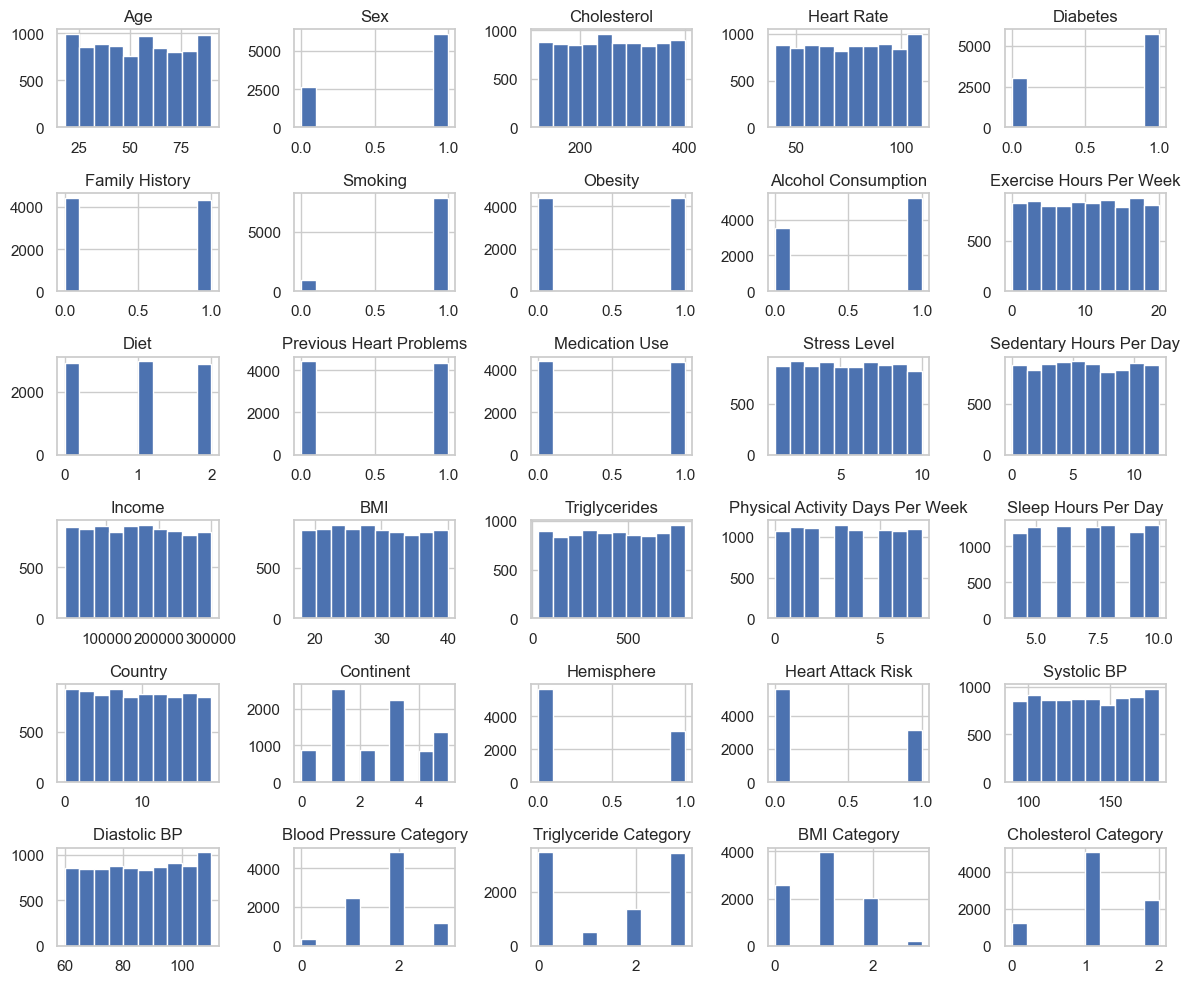

In [17]:
# Create histograms
sns.set_theme(style='whitegrid')
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

### Visual Cues from Histograms:
- Gender Distribution: There is a notable gender imbalance in the dataset, with significantly more males than females.
- Diabetes Prevalence: Diabetes appears to be prevalent in the dataset, with a significant number of individuals having diabetes compared to those who do not.
- Smoking Habits: There is a notable disparity in smoking habits, with a larger portion of individuals being smokers compared to non-smokers.
- Alcohol Consumption: The number of individuals who consume alcohol slightly exceeds those who do not.
- Geographical Distribution: The dataset is predominantly composed of individuals from asia and europe.
- Hemisphere Distribution: The dataset contains a higher portion of individuals residing in the nothern hemisphere.
- Heart Attack Risk: The number of individuals at risk of a heart attack is lower than those without a heart attack risk.
- Blood Pressure Category: Stage 2 hypertension was the highest category, followed by Stage 1 hypertension, Normal, and then Elevated blood pressure.
- Triglyceride Category: High and Very High triglyceride levels were the most common categories, followed by Normal and then Mildly High.
- BMI Category: Obesity was the most prevalent category, followed by Normal Weight, Overweight, and then Underweight.
- Cholesterol Category: The Dangerous cholesterol category was the highest, followed by Heart-Healthy, and then At-Risk.

### Correlation Analysis

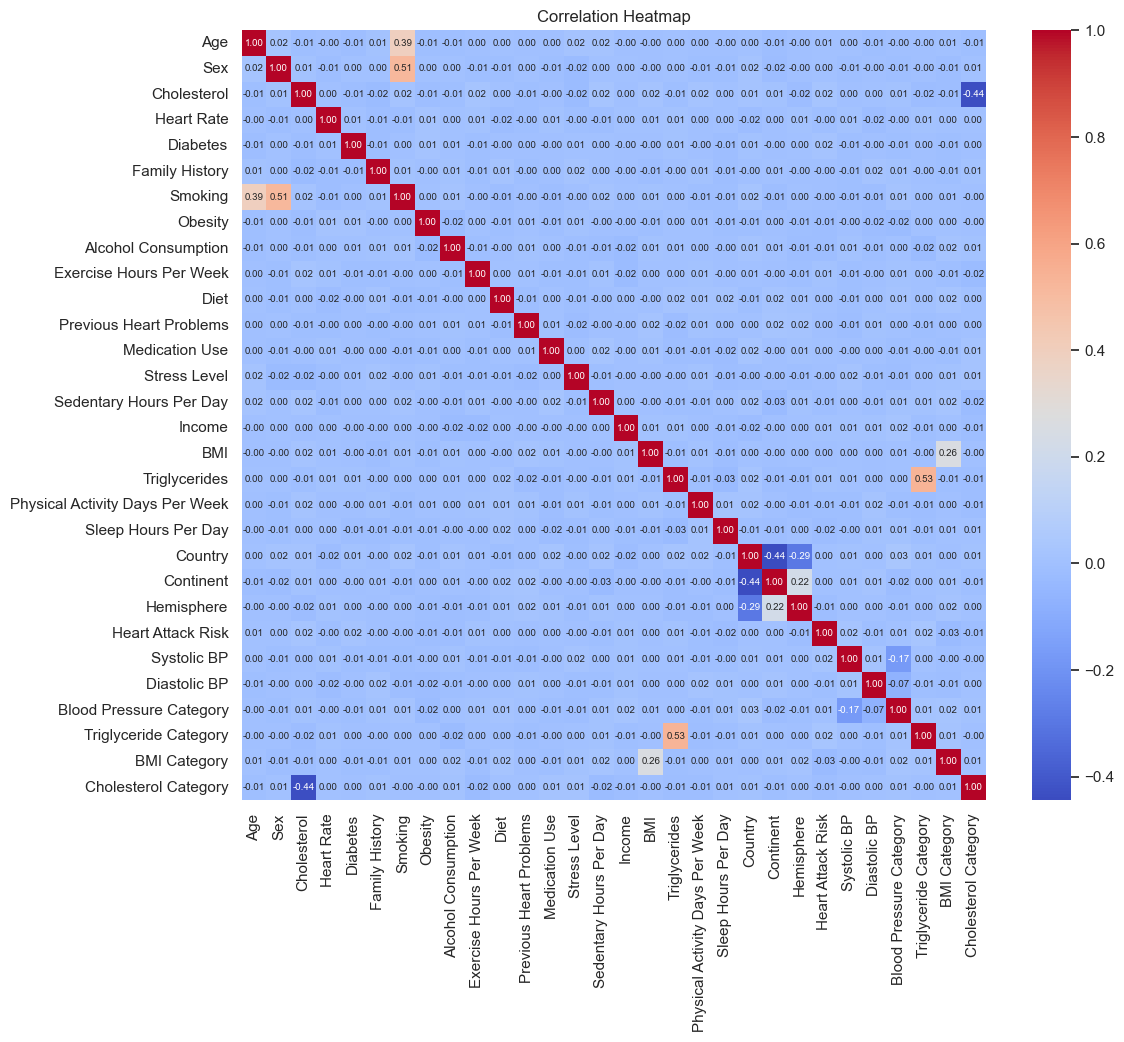

In [18]:
# Caculate correlations and display matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":7})
plt.title("Correlation Heatmap")
plt.show()

### Visual Cues from Heatmap
- Age and Smoking Correlation: Despite a moderate positive correlation(correlation coefficient = .39) between age and smoking habits, it's important to note that the dataset is predominantly composed of males. Thus, while age may influence smoking behavior, the gender distribution could confound this relationship.
- Gender and Smoking Correlation: There is a moderate positive correlation(correlation coefficient = .51) between gender and smoking habits. Given the predominance of males in the dataset, this correlation suggests a higher likelihood of smoking among males compared to females. 

### Model Selection and Evaluation

## Logistic Regression, Decision Tree and Random Forest

In [19]:
# Split the data into training and testing sets
X = df.drop(['Heart Attack Risk'], axis=1)
y = df['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Initialize logistic regression, decision tree and random forest classifier
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

In [21]:
# Function
models = [log_reg, decision_tree, random_forest]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    print("\n")

Model: Logistic Regression
Accuracy: 0.64
Precision: 0.00
Recall: 0.00
F1-score: 0.00
ROC-AUC: 0.50


Model: Decision Tree
Accuracy: 0.55
Precision: 0.38
Recall: 0.39
F1-score: 0.38
ROC-AUC: 0.52


Model: Random Forest
Accuracy: 0.64
Precision: 0.36
Recall: 0.02
F1-score: 0.04
ROC-AUC: 0.50




In [22]:
# Peform cross-validation for each model
for model, name in zip(models, model_names):
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Cross-validation scores for {name}: {cv_scores}")
    print(f"Mean CV accuracy: {cv_scores.mean():.2f}")
    print("\n")

Cross-validation scores for Logistic Regression: [0.64194009 0.64194009 0.64194009 0.64194009 0.64122682]
Mean CV accuracy: 0.64


Cross-validation scores for Decision Tree: [0.52282454 0.5342368  0.49500713 0.56134094 0.55135521]
Mean CV accuracy: 0.53


Cross-validation scores for Random Forest: [0.63837375 0.62553495 0.63552068 0.63195435 0.63766049]
Mean CV accuracy: 0.63




### Key takeaways from the results
- Logistics Regression: Achieved an accuracy of 0.64 on the test set. However, it seems to perform poorly in ROC-AUC, suggesting that it might not be the best model for this task.
- Decision Tree: Achieved an accuracy score of .55 on the test set, with moderate precision, recall and F1-score. The ROC-AUC score is slightly above 0.5, indicating a marginally better performance than random guessing.
- Random Forest: Similar to Logistic Regression, Random Forest achieved an accuracy score of 0.63 on the test set. However, its precision, recall, and F1-score are relatively low, suggesting room for improvement.
- Cross-Validation: Cross-validation results provide additional insights into the models' generalization performance. While Logistics Regression and Random Forest exhibit consistent performance across folds, the Decision Tree model's accuracy varies significantly.

## Data Analysis and Visualization

### Distribution of Triglyceride Categories by Heart Attack Risk Categories

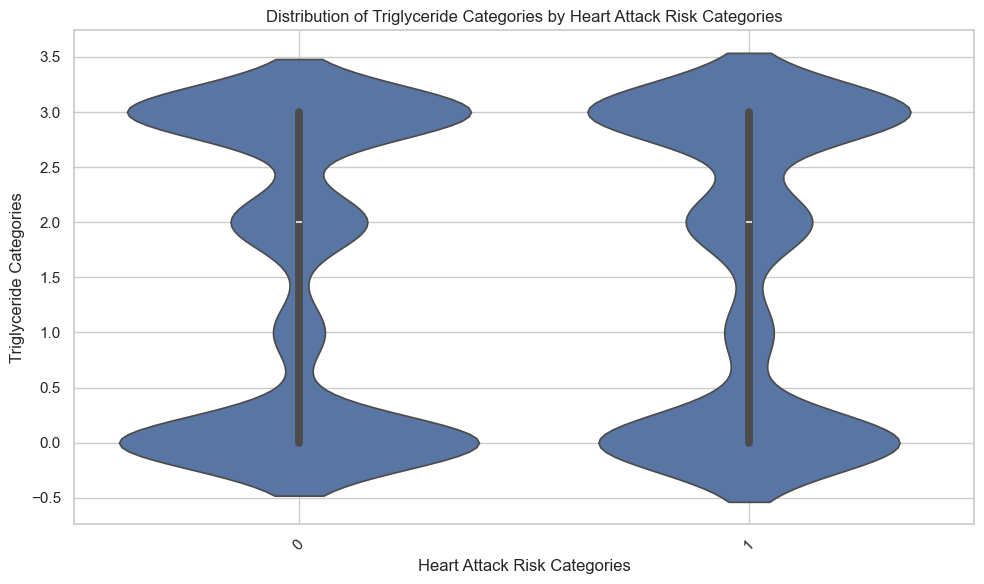

In [27]:
# Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Heart Attack Risk', y='Triglyceride Category', data=df)
plt.title('Distribution of Triglyceride Categories by Heart Attack Risk Categories')
plt.xlabel('Heart Attack Risk Categories')
plt.ylabel('Triglyceride Categories')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Visual Cues from Violin Plot
- Heart Attack Risk Category 0(No Risk): The violin plot shows a slightly wider spread for the triglyceride categories compared to other heeart attack rick categories. This suggests a slightly higher variability in triglyceride categories among individuals categorized as having no risk of heart attack
- Triglyceride Category 0(High Triglycerides): Notably, the violin plot shows a considerably wider shape for triglyceride category 0 compared to the other categories. This indicates a higher variability or a broader range of triglyceride values within the high triglyceride category.


### Trends in Physical Activity Days per Week by Gender

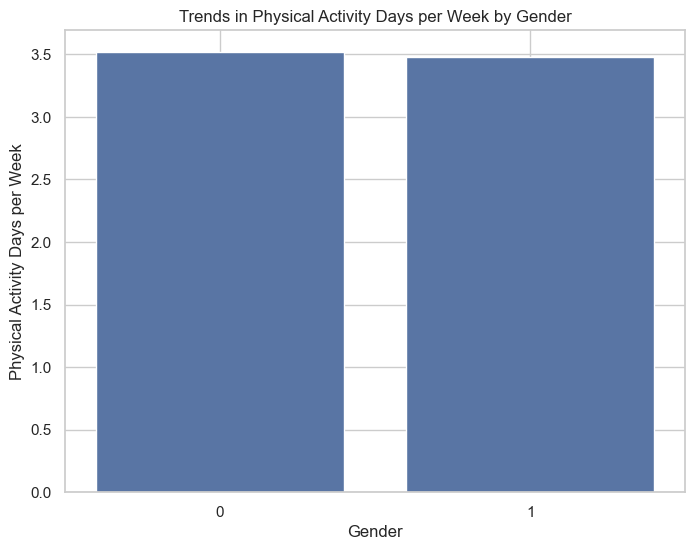

In [29]:
# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Physical Activity Days Per Week', data=df, ci=None)
plt.title('Trends in Physical Activity Days per Week by Gender')
plt.xlabel('Gender')
plt.ylabel('Physical Activity Days per Week')
plt.grid(True)
plt.show()

#### Visual Cues for Bar Plot
- Gender category 0(female) appears slightly higher compared to category 1(males), indicating a potential difference in physical activity levels between genders

### Dietary Patterns and Heart Attack Risk

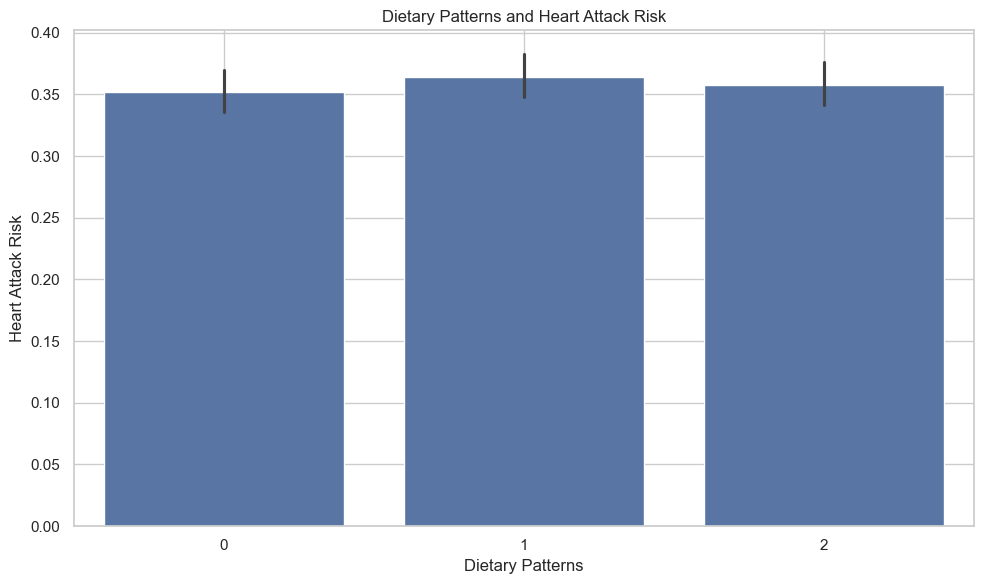

In [62]:
# Create barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Diet', y='Heart Attack Risk', data=df)
plt.title('Dietary Patterns and Heart Attack Risk')
plt.xlabel('Dietary Patterns')
plt.ylabel('Heart Attack Risk')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Visual Cues from Barplot
- When examining the relationship between dietary patterns and heart attack risk, it's important to consider the cultural context of dietary habits. The dataset represents a diverse global population, where definitions of "healthy" and "unhealthy" diets can vary significantly across cultures and regions.
- Interestingly, despite these cultural variations, we observe that individuals categorized with a "Healthy" dietary pattern (category 1) exhibit the highest heart attack risk, followed by those in the "Unhealthy" dietary pattern category (category 2), and individuals with an "Average" dietary pattern (category 0) showing the lowest heart attack risk.
- This unexpected correlation highlights the need to delve deeper into cultural dietary norms and their impact on health outcomes. It suggests that cultural factors may play a significant role in shaping dietary habits and their associated health risks, emphasizing the importance of considering cultural nuances in healthcare interventions and risk assessment strategies.

### Relationship between Family History of Heart Problems and Stress Levels

<function matplotlib.pyplot.show(close=None, block=None)>

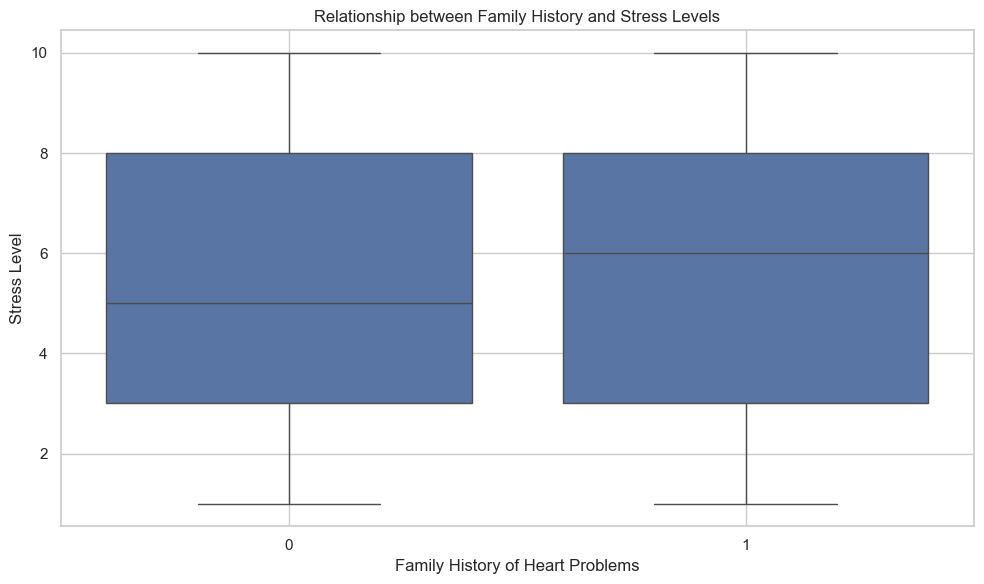

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Family History', y='Stress Level', data=df)
plt.title('Relationship between Family History and Stress Levels')
plt.xlabel('Family History of Heart Problems')
plt.ylabel('Stress Level')
plt.grid(True)
plt.tight_layout()
plt.show

#### Visuel Cues from Boxplot
- In the boxplot comparing stress levels based on family history of heart problems, the mediam stress level for individuals with no family history(category 0) appears lower compared to those with a family history(category 1). This indicates a potentially higher median stress level among individuals with a family history of heart problems.

### Association between Alcohol Consumption and Obesity

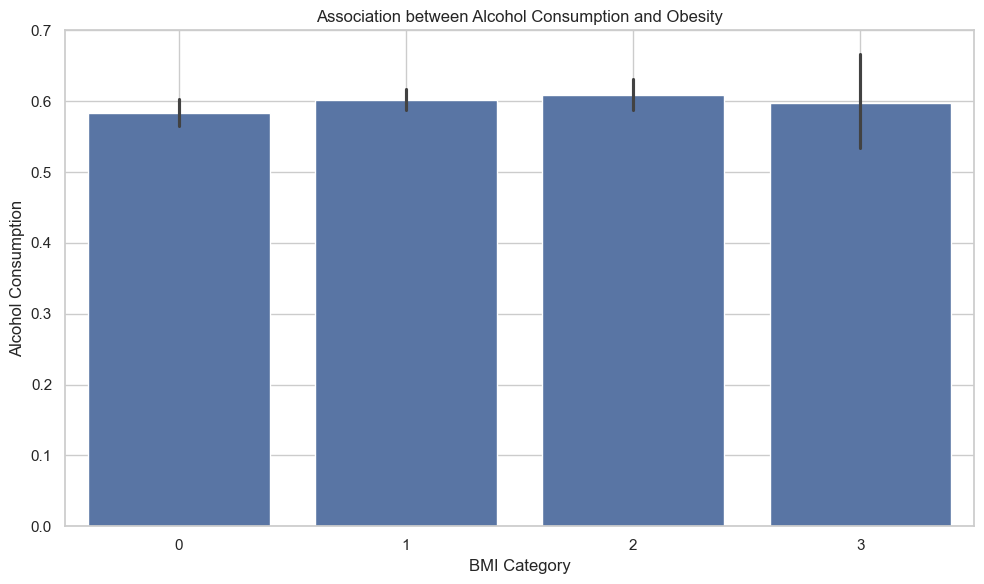

In [44]:
# Create barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='BMI Category', y='Alcohol Consumption', data=df)
plt.title('Association between Alcohol Consumption and Obesity')
plt.xlabel('BMI Category')
plt.ylabel('Alcohol Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Visual Cue from Barplot
- In this plot, we observe that the alcohol consumption is lowest for individuals in the normal weight category(category 0), followed by those in the underweight category(category 3). The alcohol consumption increases for individuals categorized as Obese(category 1) and reaches its highest level for those categorized as Overweight(category 2).

### Differences in Sedentary Hours per Day Across Countries

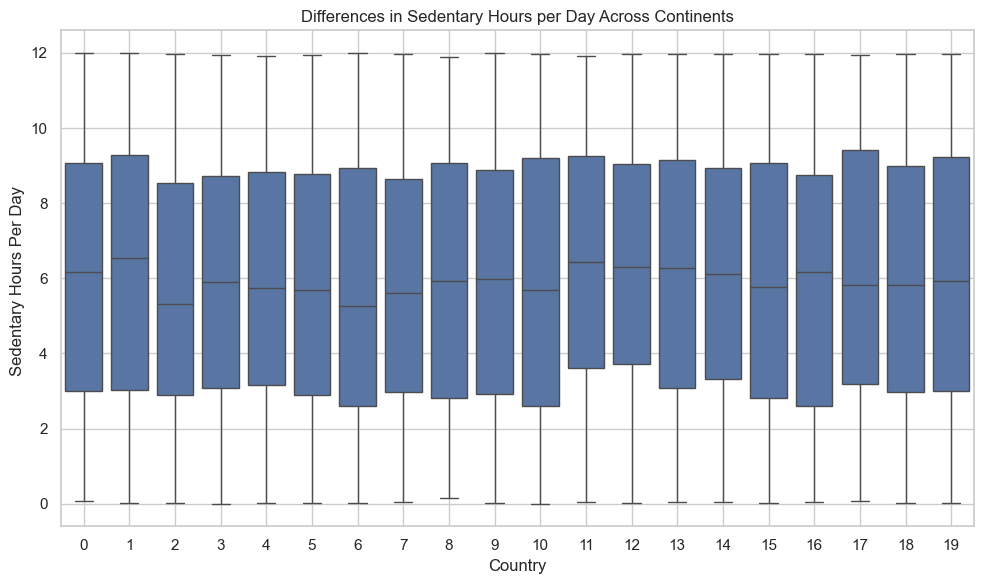

In [48]:
# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Sedentary Hours Per Day', data=df)
plt.title('Differences in Sedentary Hours per Day Across Continents')
plt.xlabel('Country')
plt.ylabel('Sedentary Hours Per Day ')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Visual Cues from Boxplot
- Countries like Australia (category 1), New Zealand (category 11), Nigeria (category 12), and South Africa (category 13) exhibit the highest median values for sedentary hours per day, indicating potentially higher levels of sedentary behavior in these regions.
- New Zealand and Nigeria (category 12) stand out with the highest values at the 25th percentile, suggesting a significant portion of the population in these countries engage in prolonged sedentary activities.
- Conversely, France (category 6), Japan (category 10), and Thailand (category 16) demonstrate the lowest 25th percentile values, indicating comparatively lower levels of sedentary behavior among their populations.
- Australia and the United Kingdom (category 17) show the highest 75th percentile values, indicating that a significant portion of individuals in these countries spend more time in sedentary activities compared to others.

### Patterns in Heart Rate Based on Smoking Habits

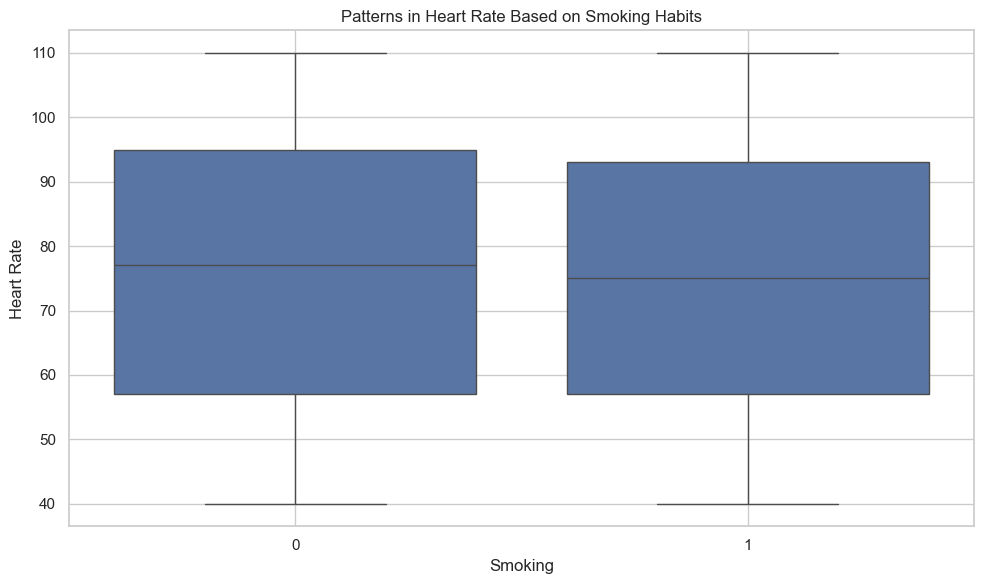

In [49]:
# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Smoking', y='Heart Rate', data=df)
plt.title('Patterns in Heart Rate Based on Smoking Habits')
plt.xlabel('Smoking')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Visual Cues from Boxplot
- Non-smokers(category 0) demonstrate a higher median heart rate compared to smokers(category 1), indicating a potential association between smoking habits and heart rate levels. Also, the 75th percentile calue for non-smokers is higher than that of smokers, suggesting that a larger portion of non-smokers have higher heart rates compared to smokers.

### Dietary Patterns and Heart Attack Risk

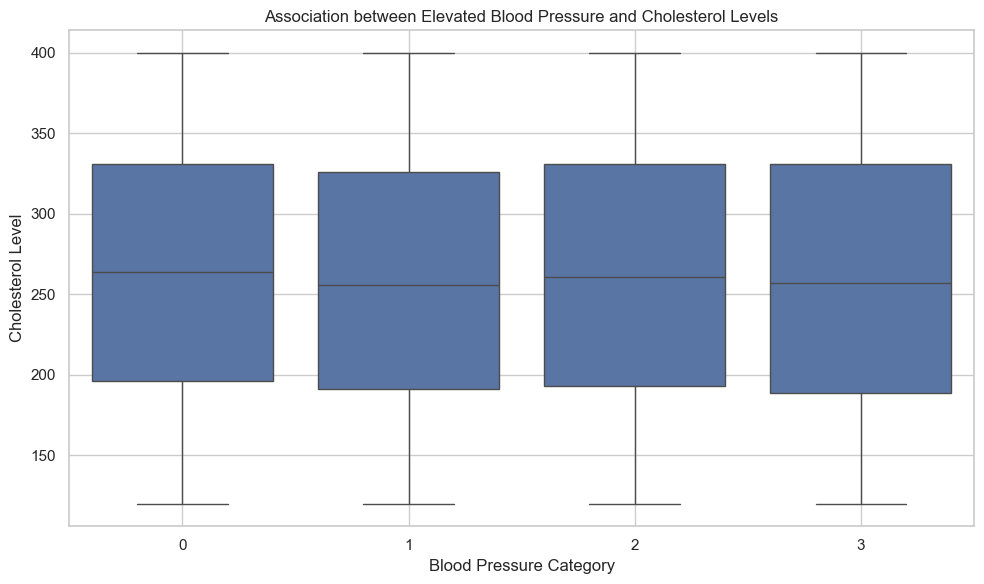

In [51]:
# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Blood Pressure Category', y='Cholesterol', data=df)
plt.title('Association between Elevated Blood Pressure and Cholesterol Levels')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Cholesterol Level')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Visual Cues for Boxplot
- Individuals categorized with normal blood pressure (category 0) demonstrate the highest median cholesterol levels, followed by those in category 2, suggesting a potential association between normal blood pressure and higher cholesterol levels.
- Both the median and the 75th percentile values for cholesterol levels are highest in category 0, indicating that individuals with normal blood pressure tend to have higher cholesterol levels compared to other categories.
- Categories 1 and 3 exhibit lower median and 75th percentile cholesterol levels, suggesting that individuals with elevated blood pressure may have relatively lower cholesterol levels.
- The 25th percentile values for cholesterol levels in categories 1 and 3 are the lowest among the four categories, indicating a higher proportion of individuals with lower cholesterol levels in these categories.

### Distribution of Diabetes Prevalence Across Countries

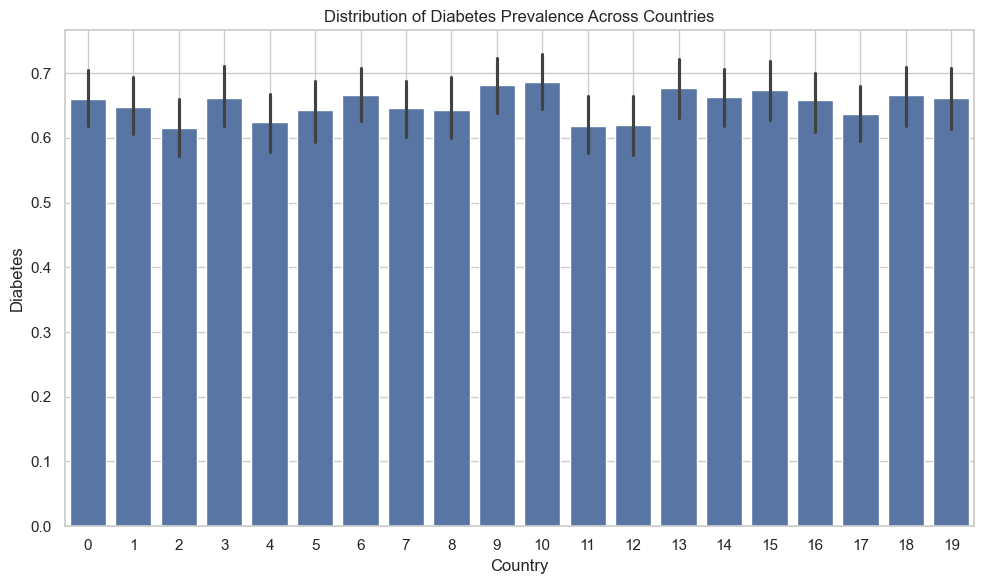

In [52]:
# Create barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Diabetes', data=df)
plt.title('Distribution of Diabetes Prevalence Across Countries')
plt.xlabel('Country')
plt.ylabel('Diabetes')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Visual Cues from Barplot
- Brazil (category 2), China (category 4), New Zealand (category 11), and Nigeria (category 12) exhibit the lowest prevalence of diabetes.
- Conversely, Italy (category 9), Japan (category 10), and South Africa (category 13) demonstrate noticeably higher prevalence of diabetes compared to others.

### Impact of Income on Heart Attack Risk

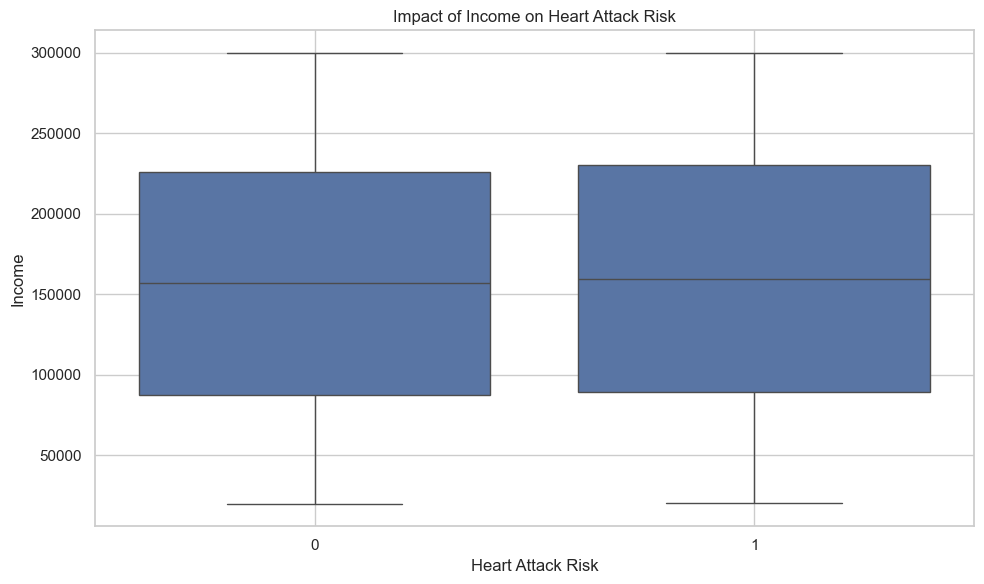

In [57]:
# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Heart Attack Risk', y='Income', data=df)
plt.title('Impact of Income on Heart Attack Risk')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Income')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Visual Cues from Boxplot
- For heart attack risk category 0 (No Risk), the median income is slightly lower compared to category 1 (Risk), although the difference is minimal.
- The 75th percentile income for individuals with no heart attack risk is slightly lower than those with a heart attack risk, indicating a slight disparity in income distribution between the two risk categories.

### Examining Heart Attack Risk Across Genders

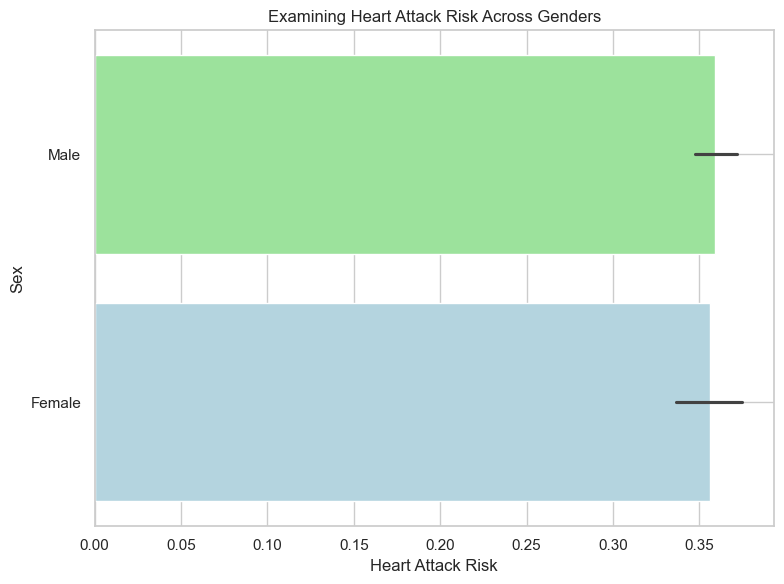

In [73]:
# Convert numerical values in 'Sex' column to categorical values
df['Sex'] = df['Sex'].replace({0: 'Female', 1: 'Male'})

# Create barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Heart Attack Risk', y='Sex', hue='Sex', data=df, dodge=False, 
            palette={'Female': 'lightblue', 'Male': 'lightgreen'})
plt.title('Examining Heart Attack Risk Across Genders')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Sex')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Visual Cues from barplot
- More males are at risk of heart attacks then females.

### Kaplan-Meier estimator

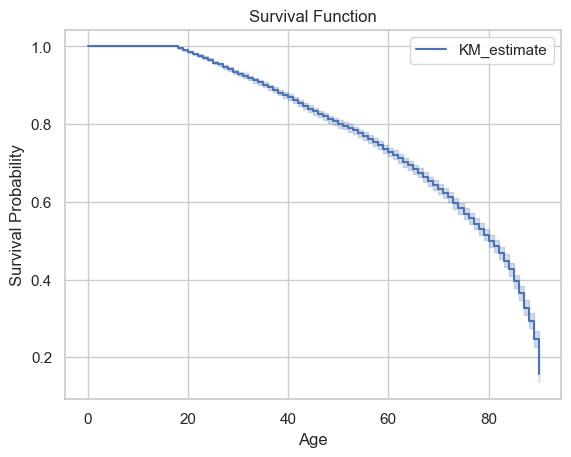

In [81]:
time = df['Age']
event = df['Heart Attack Risk']

kmf = KaplanMeierFitter()
kmf.fit(time, event_observed=event)

kmf.plot()
plt.title('Survival Function')
plt.xlabel('Age')
plt.ylabel('Survival Probability')
plt.show()